# Prédiction et classification du cancer des seins
*Ce projet vise à résoudre un probléme consernant une classification des patients ayant le cancer des seins et ceux n'ayant pas le cancer. Un modèle pareil aidera les hôpitaux en terme de decicion making sur les nouveaux patient avec les même données cliniques.*

# Analyse et Visualisation des données

In [1]:
# Importatioin des bibliothèques pour l'analyse des données
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Chargement et visualisation de l'entete du Dataset
df = pd.read_csv('Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
#visualisation de la forme et des types des variables de notre dataset
print('la Forme',df.shape)
print('\n')
print('les types des variables \n',df.dtypes)

la Forme (569, 6)


les types des variables 
 mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


### Analyse exploratoire

In [5]:
# visualisation l'occurence de chaque entrée
df.value_counts()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  diagnosis
6.981        13.43         43.79           143.5      0.11700          1            1
14.860       16.94         94.89           673.7      0.08924          1            1
14.710       21.59         95.55           656.9      0.11370          0            1
14.740       25.42         94.70           668.6      0.08275          1            1
14.760       14.74         94.87           668.7      0.08875          1            1
                                                                                   ..
12.200       15.21         78.01           457.9      0.08673          1            1
12.190       13.29         79.08           455.8      0.10660          1            1
12.180       20.52         77.22           458.7      0.08013          1            1
             17.84         77.79           451.1      0.10450          1            1
28.110       18.47         188.50          2499.0     0.114

In [6]:
#verifions si certaines variables ont des valeur nulles
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

On rémarque qu'il y'a pas des valeurs manquantes

In [7]:
# Statistique descriptive des variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


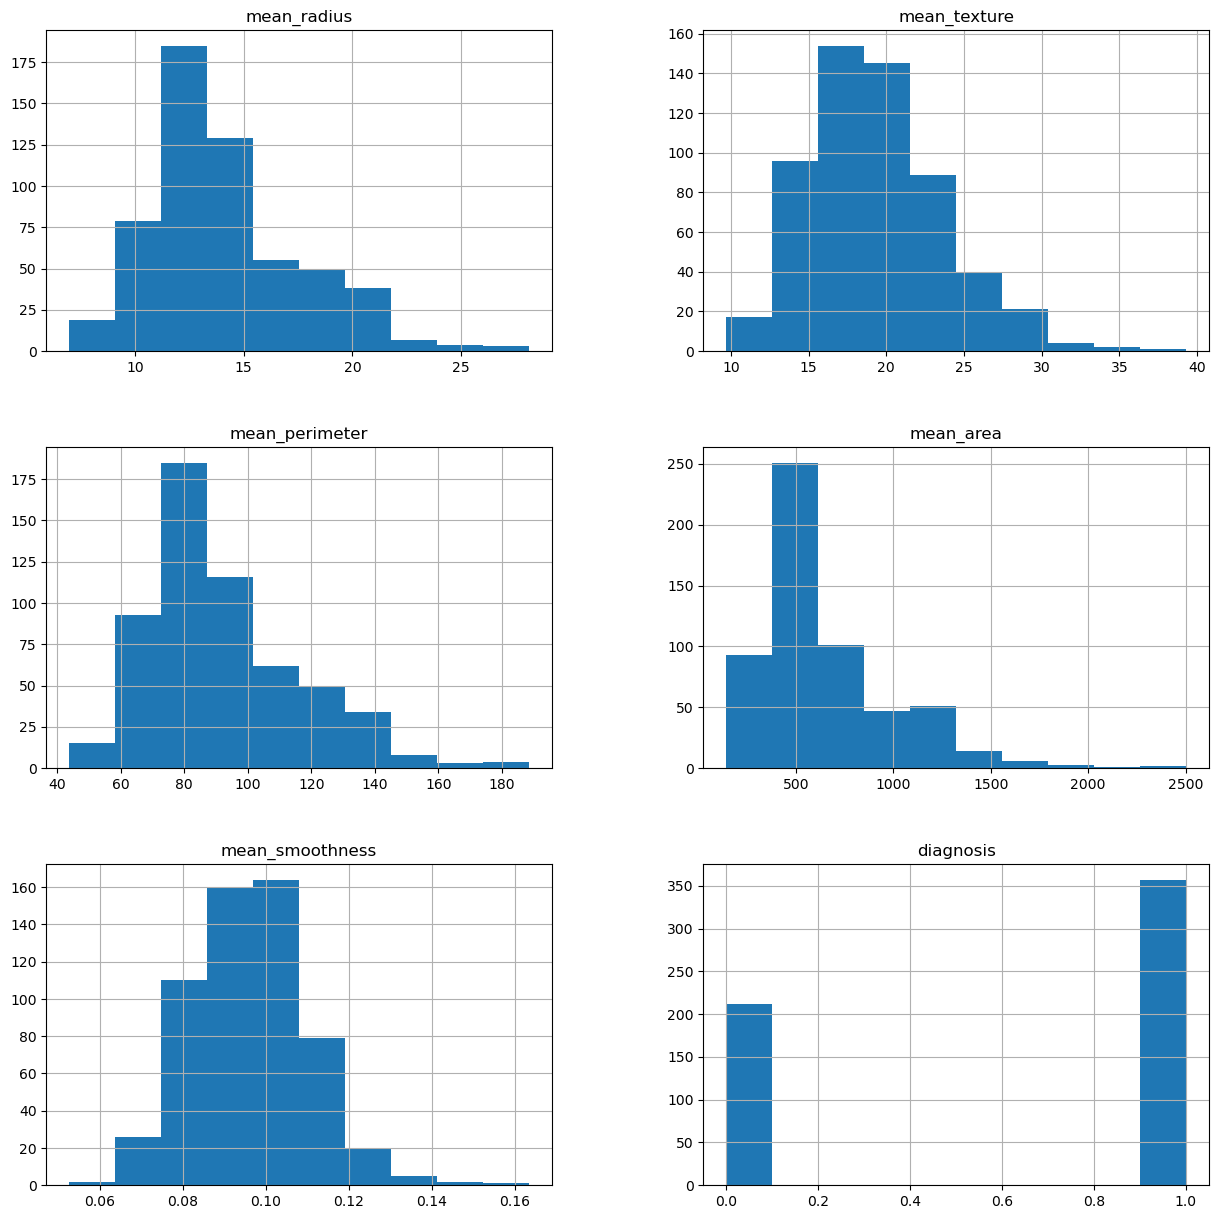

In [8]:
df.hist(figsize=(15,15));

In [9]:
# Matrice de corrélation
df.iloc[:,1:5].corr()

,mean_texture,mean_perimeter,mean_area,mean_smoothness
mean_texture,1.000000,0.329533,0.321086,-0.023389
mean_perimeter,0.329533,1.000000,0.986507,0.207278
mean_area,0.321086,0.986507,1.000000,0.177028
mean_smoothness,-0.023389,0.207278,0.177028,1.000000


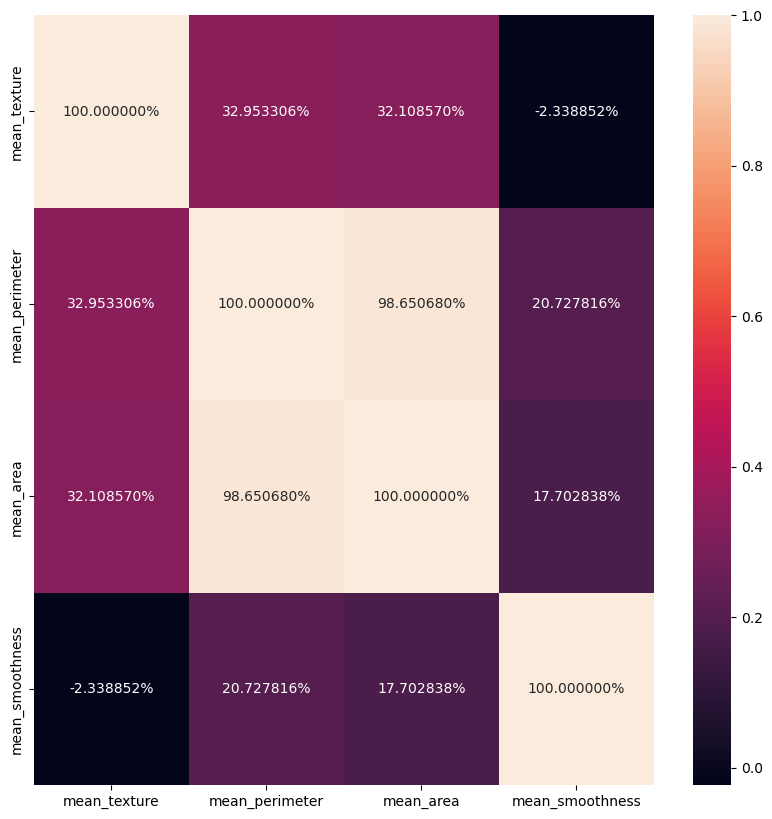

In [10]:
# Visualisation de la matrice de correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:5].corr(), annot=True, fmt="0%");

##### Normalisation des données

In [11]:
X = df.drop(columns='diagnosis', axis=1)
y = df['diagnosis']

In [21]:
def fonction_normalisation(data):
    dmean=np.mean(data, axis=0)#on calcul la moyenne de chaque variable
    dstd=np.std(data, axis=0)#on caclul  l'ecart type de chaque variable
    data_scaled=(data-dmean)/dstd
    return data_scaled

La normalisation est généralement effectuée en soustrayant la moyenne de chaque variable indépendante et en la divisant par l'écart type de cette variable.

In [22]:
Standard_df=fonction_normalisation(X)
X.iloc[:, 0:-1]=Standard_df.iloc[:,0:-1]
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,1.097064,-2.073335,1.269934,0.984375,0.11840
1,1.829821,-0.353632,1.685955,1.908708,0.08474
2,1.579888,0.456187,1.566503,1.558884,0.10960
3,-0.768909,0.253732,-0.592687,-0.764464,0.14250
4,1.750297,-1.151816,1.776573,1.826229,0.10030


## Diviser les données en données d'entraînement et en données de test
(80% des données pour l'entrainement de notre model et 20% pour le test de validation)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
print('le nombre total des données  :',X.value_counts().sum(),'\n'
'le nombre des données pour l\'entrainement du model :',X_train.value_counts().sum(),' soit 80 %\n'
'le nombre des données pour le test du model :',X_test.value_counts().sum(),'soit 20 %')

le nombre total des données  : 569 
le nombre des données pour l'entrainement du model : 455  soit 80 %
le nombre des données pour le test du model : 114 soit 20 %


## Modelisation et entrainement du modèle

### Creation du Modèle de Régression Logistique

In [25]:
model = LogisticRegression(solver='lbfgs', max_iter=1000,random_state=20)

## Entraînement du modèle de Régression Logistique

In [26]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=20)

##### Evaluation du modèle

In [27]:
# Score de précision d'entraînement
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

In [28]:
print("Données de précision d'entraînement = ", training_data_accuracy)

Données de précision d'entraînement =  0.8879120879120879


In [31]:
# Score de précision de test
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
test_data_accuracy

0.9298245614035088